In [4]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
# Reading the Vitals dataset
#Set Filepath ! 
filepath='../output/VC2B008BF_02945C_vitals.csv'
dataset = pd.read_csv(filepath, header=None)
# See the shape of the dataset
print(dataset.shape)
dataset.describe()

(1116671, 7)


,0,1,2,3,4,6
count,1.116671e+06,107517.000000,106635.000000,107517.000000,430085.000000,579069.000000
mean,1.599259e+12,80.934373,15.543489,34.238678,837.727705,742.708299
std,1.241875e+08,10.321054,3.042769,1.409316,513.812101,106.235340
min,1.599042e+12,58.000000,4.000000,30.273361,0.000000,0.000000
25%,1.599151e+12,72.000000,13.000000,33.011856,446.000000,664.000000
50%,1.599260e+12,82.000000,15.000000,34.570999,775.000000,720.000000
75%,1.599367e+12,89.000000,17.000000,35.450516,1136.000000,816.000000
max,1.599472e+12,185.000000,32.000000,39.178467,1761.000000,8704.000000


In [8]:
# Reading the Vital dataset and adding suitable header for each column
datasetVitals = pd.read_csv(filepath)
datasetVitals.columns = ['TimeStamp', 'HearthRate', 'Respiration Rate', 'Skin Temp', 'Steps', 'Posture', 'RRI']
# See the shape of the dataset
print(datasetVitals.shape)
datasetVitals
# Some statitistics of the dataset
datasetVitals.describe()

(1116670, 7)


,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,RRI
count,1.116670e+06,107517.000000,106635.000000,107517.000000,430085.000000,579068.000000
mean,1.599259e+12,80.934373,15.543489,34.238678,837.727705,742.709582
std,1.241873e+08,10.321054,3.042769,1.409316,513.812101,106.230948
min,1.599042e+12,58.000000,4.000000,30.273361,0.000000,256.000000
25%,1.599151e+12,72.000000,13.000000,33.011856,446.000000,664.000000
50%,1.599260e+12,82.000000,15.000000,34.570999,775.000000,720.000000
75%,1.599367e+12,89.000000,17.000000,35.450516,1136.000000,816.000000
max,1.599472e+12,185.000000,32.000000,39.178467,1761.000000,8704.000000


In [9]:
# Convert the data to dataframe
datasetVitals = pd.DataFrame(data=datasetVitals)

In [10]:
# change the date from unix to time stamp
# The unit of the arg (D,s,ms,us,ns) denote the unit
# I took ms
datasetVitals['TimeStamp'] = pd.to_datetime(datasetVitals['TimeStamp'],unit='ms')
datasetVitals['TimeStamp']

0         2020-09-02 10:24:24.633
1         2020-09-02 10:24:24.993
2         2020-09-02 10:24:25.077
3         2020-09-02 10:24:25.353
4         2020-09-02 10:24:25.873
                    ...          
1116665   2020-09-07 09:47:34.961
1116666   2020-09-07 09:47:38.077
1116667   2020-09-07 09:47:38.809
1116668   2020-09-07 09:47:39.077
1116669   2020-09-07 09:47:40.077
Name: TimeStamp, Length: 1116670, dtype: datetime64[ns]

In [13]:
#Rolling averages 
RollingM_HR=(datasetVitals['HearthRate']).rolling(window=60, win_type='boxcar').mean()
print(RollingM_HR)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1116665   NaN
1116666   NaN
1116667   NaN
1116668   NaN
1116669   NaN
Name: HearthRate, Length: 1116670, dtype: float64


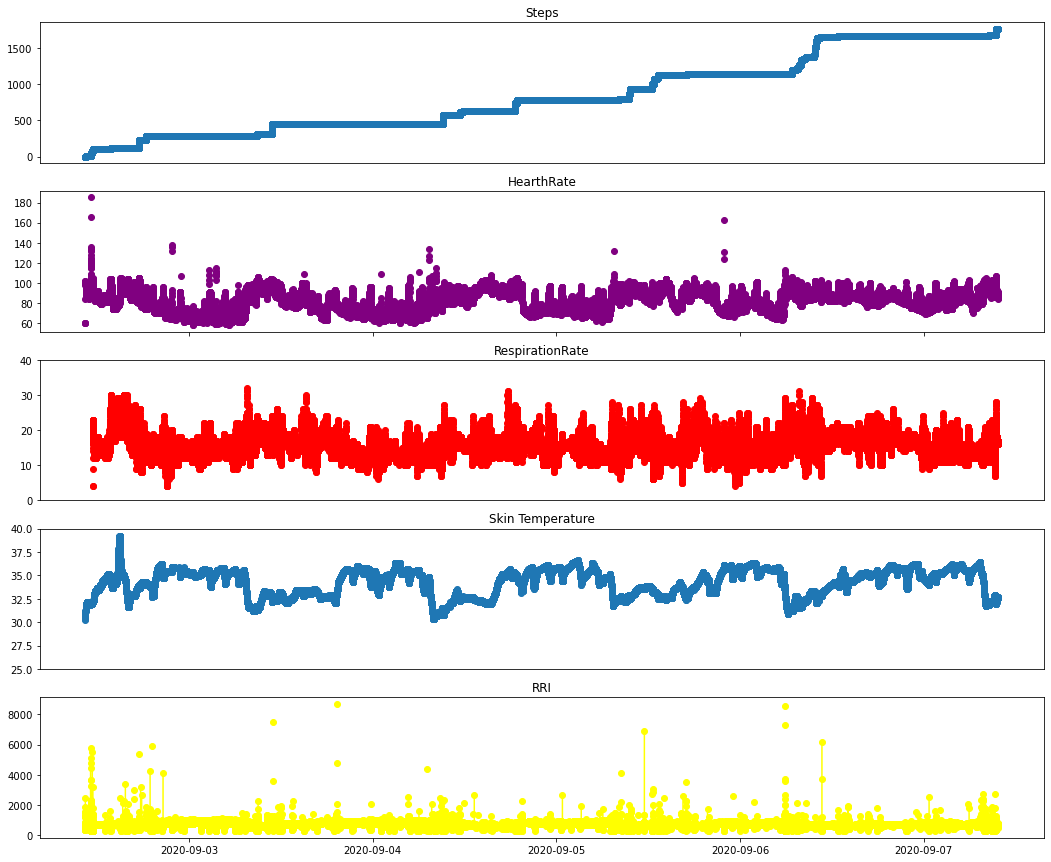

In [16]:
#Visualization of Data 
t=datasetVitals['TimeStamp']
plt.figure(figsize=(18,15))
ax1 = plt.subplot(511)
plt.plot(t, datasetVitals['Steps'], linestyle='-', marker='o')
ax1.title.set_text('Steps')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
#ax1.set_ylim([0, 5400])
# 
ax2 = plt.subplot(512, sharex=ax1)
plt.plot(t, datasetVitals['HearthRate'], linestyle='-', marker='o',color='purple')
ax2.title.set_text('HearthRate')
plt.setp(ax2.get_xticklabels(), visible=False)
#show rolling averaage for heart rate 
# 
ax3 = plt.subplot(513, sharex=ax1)
plt.plot(t, datasetVitals['Respiration Rate'], linestyle='-', marker='o',color='red')
ax3.title.set_text('RespirationRate')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
ax3.set_ylim([0, 40])

ax4 = plt.subplot(514, sharex=ax1)
plt.plot(t, datasetVitals['Skin Temp'], linestyle='-', marker='o')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
ax4.title.set_text('Skin Temperature')
ax4.set_ylim([25, 40])

ax5 = plt.subplot(515)
plt.plot(t, datasetVitals['RRI'], linestyle='-', marker='o',color='yellow')
ax5.title.set_text('RRI')
plt.setp(ax1.get_xticklabels(), fontsize=6)
#ax5.set_ylim([25, 40])


In [17]:
#after converting date from unix to normal time stamp
datasetVitals

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI
0,2020-09-02 10:24:24.633,NaN,NaN,NaN,NaN,NaN,2456.0
1,2020-09-02 10:24:24.993,NaN,NaN,NaN,NaN,NaN,360.0
2,2020-09-02 10:24:25.077,NaN,NaN,NaN,0.0,Unknown,NaN
3,2020-09-02 10:24:25.353,NaN,NaN,NaN,NaN,NaN,360.0
4,2020-09-02 10:24:25.873,NaN,NaN,NaN,NaN,NaN,520.0
...,...,...,...,...,...,...,...
1116665,2020-09-07 09:47:34.961,NaN,NaN,NaN,NaN,NaN,648.0
1116666,2020-09-07 09:47:38.077,NaN,NaN,NaN,1761.0,Standing,NaN
1116667,2020-09-07 09:47:38.809,NaN,NaN,NaN,NaN,NaN,640.0
1116668,2020-09-07 09:47:39.077,NaN,NaN,NaN,1761.0,Standing,NaN


In [18]:
# Some statitistics of the dataset
datasetVitals.describe()

,HearthRate,Respiration Rate,Skin Temp,Steps,RRI
count,107517.000000,106635.000000,107517.000000,430085.000000,579068.000000
mean,80.934373,15.543489,34.238678,837.727705,742.709582
std,10.321054,3.042769,1.409316,513.812101,106.230948
min,58.000000,4.000000,30.273361,0.000000,256.000000
25%,72.000000,13.000000,33.011856,446.000000,664.000000
50%,82.000000,15.000000,34.570999,775.000000,720.000000
75%,89.000000,17.000000,35.450516,1136.000000,816.000000
max,185.000000,32.000000,39.178467,1761.000000,8704.000000


In [19]:
# Filter the unique categories (The strings)
datasetVitals.describe(exclude=[np.number]) 

,TimeStamp,Posture
count,1116670,430085
unique,1006919,5
top,2020-09-06 17:50:45.077000,LayingDown
freq,6,216720
first,2020-09-02 10:24:24.633000,NaN
last,2020-09-07 09:47:40.077000,NaN


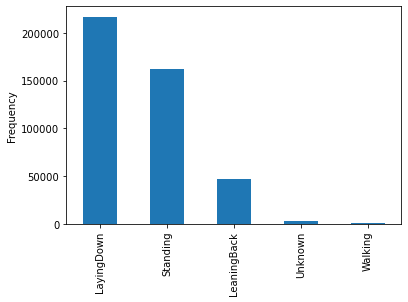

In [20]:
# Plot the Posture column
#Possible Postures according to VitalPatch documnets: 
#Lying Down • Leaning • Upright (Standing/Sitting) • Walking • Running • Unknown
#Document: https://vitalconnect.com/docs/mkt081/RevD/MKT-081,%20QuickStart%20for%20VistaPoint%202.0,%20Rev.%20D.pdf
datasetVitals['Posture'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

In [21]:
#Filter Satanding Posture
standing = datasetVitals[datasetVitals['Posture'] == 'Standing']
standing

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI
9669,2020-09-02 11:23:21.077,NaN,NaN,NaN,105.0,Standing,NaN
9671,2020-09-02 11:23:22.077,NaN,NaN,NaN,105.0,Standing,NaN
9675,2020-09-02 11:23:23.077,NaN,NaN,NaN,105.0,Standing,NaN
9677,2020-09-02 11:23:24.077,NaN,NaN,NaN,105.0,Standing,NaN
9681,2020-09-02 11:23:25.077,NaN,NaN,NaN,105.0,Standing,NaN
...,...,...,...,...,...,...,...
1116660,2020-09-07 09:47:31.077,NaN,NaN,NaN,1761.0,Standing,NaN
1116661,2020-09-07 09:47:32.077,NaN,NaN,NaN,1761.0,Standing,NaN
1116666,2020-09-07 09:47:38.077,NaN,NaN,NaN,1761.0,Standing,NaN
1116668,2020-09-07 09:47:39.077,NaN,NaN,NaN,1761.0,Standing,NaN


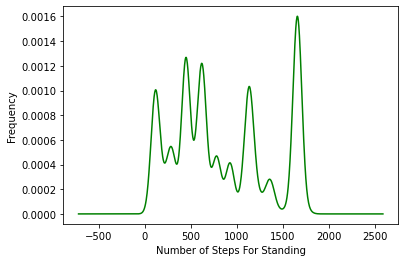

In [22]:
# plot number of steps for Standing
standing['Steps'].plot(kind='kde', color='green')
plt.xlabel('Number of Steps For Standing')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Steps For Standing')

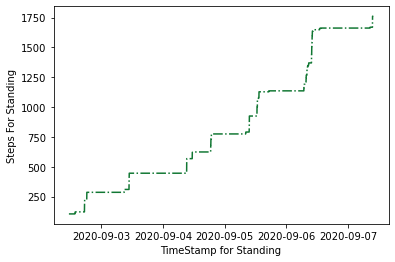

In [23]:
# plot number of steps and time stamp for Standing
plt.plot(standing['TimeStamp'], standing['Steps'], linestyle='dashdot', color= '#117733')
plt.xlabel('TimeStamp for Standing')
plt.ylabel('Steps For Standing')

In [24]:
#Filter LayingDown Posture
layingDown = datasetVitals[datasetVitals['Posture'] == 'LayingDown']
layingDown

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI
30625,2020-09-02 13:34:19.077,NaN,NaN,NaN,105.0,LayingDown,NaN
30628,2020-09-02 13:34:20.077,NaN,NaN,NaN,105.0,LayingDown,NaN
30956,2020-09-02 13:36:13.077,NaN,NaN,NaN,105.0,LayingDown,NaN
30959,2020-09-02 13:36:14.077,NaN,NaN,NaN,105.0,LayingDown,NaN
30961,2020-09-02 13:36:15.077,NaN,NaN,NaN,105.0,LayingDown,NaN
...,...,...,...,...,...,...,...
1114856,2020-09-07 09:27:46.077,NaN,NaN,NaN,1669.0,LayingDown,NaN
1114859,2020-09-07 09:27:47.077,NaN,NaN,NaN,1669.0,LayingDown,NaN
1115366,2020-09-07 09:30:30.077,NaN,NaN,NaN,1761.0,LayingDown,NaN
1115369,2020-09-07 09:30:31.077,NaN,NaN,NaN,1761.0,LayingDown,NaN


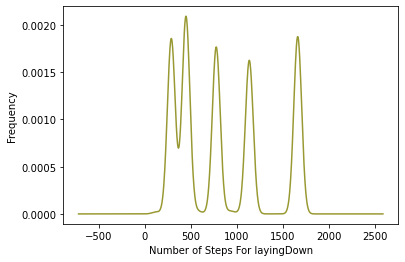

In [49]:
# plot number of steps for LayingDown
layingDown['Steps'].plot(kind='kde', color= '#999933')
plt.xlabel('Number of Steps For layingDown')
plt.ylabel('Frequency')
plt.show()

In [26]:
#Filter LeaningBack Posture
leaningBack = datasetVitals[datasetVitals['Posture'] == 'LeaningBack']
leaningBack

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI
9743,2020-09-02 11:23:47.077,NaN,NaN,NaN,105.0,LeaningBack,NaN
9745,2020-09-02 11:23:48.077,NaN,NaN,NaN,105.0,LeaningBack,NaN
9748,2020-09-02 11:23:49.077,NaN,NaN,NaN,105.0,LeaningBack,NaN
10001,2020-09-02 11:25:16.077,NaN,NaN,NaN,105.0,LeaningBack,NaN
10003,2020-09-02 11:25:17.077,NaN,NaN,NaN,105.0,LeaningBack,NaN
...,...,...,...,...,...,...,...
1116395,2020-09-07 09:45:50.077,NaN,NaN,NaN,1761.0,LeaningBack,NaN
1116398,2020-09-07 09:45:51.077,NaN,NaN,NaN,1761.0,LeaningBack,NaN
1116630,2020-09-07 09:47:17.077,NaN,NaN,NaN,1761.0,LeaningBack,NaN
1116633,2020-09-07 09:47:18.077,NaN,NaN,NaN,1761.0,LeaningBack,NaN


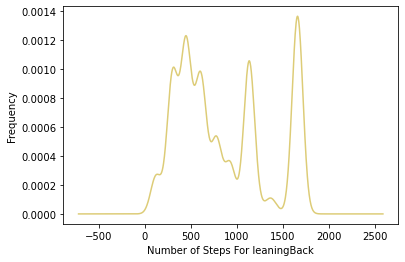

In [28]:
# plot number of leaningBack for Leaning Back
leaningBack['Steps'].plot(kind='kde', color = '#DDCC77')
plt.xlabel('Number of Steps For leaningBack')
plt.ylabel('Frequency')
plt.show()

(array([737671., 737672., 737673., 737674., 737675.]),
 <a list of 5 Text major ticklabel objects>)

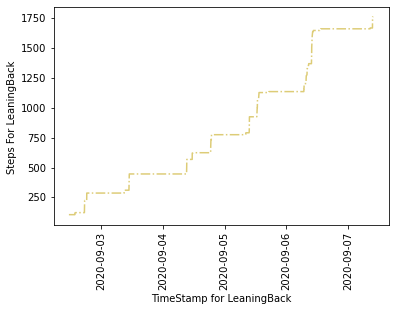

In [29]:
# plot number of steps and time stamp for LeaningBack
plt.plot(leaningBack['TimeStamp'], leaningBack['Steps'], linestyle='dashdot',color = '#DDCC77')
plt.xlabel('TimeStamp for LeaningBack')
plt.ylabel('Steps For LeaningBack ')
plt.xticks(rotation='vertical')

In [30]:
datasetVitals[datasetVitals['Posture'] == 'Sitting']

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI


In [31]:
#Filter Walking from Posture
walking = datasetVitals[datasetVitals['Posture'] == 'Walking']
walking

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI
31899,2020-09-02 13:41:47.077,NaN,NaN,NaN,111.0,Walking,NaN
31902,2020-09-02 13:41:48.077,NaN,NaN,NaN,111.0,Walking,NaN
31906,2020-09-02 13:41:49.077,NaN,NaN,NaN,111.0,Walking,NaN
33160,2020-09-02 13:49:06.077,NaN,NaN,NaN,120.0,Walking,NaN
33163,2020-09-02 13:49:07.077,NaN,NaN,NaN,122.0,Walking,NaN
...,...,...,...,...,...,...,...
1115245,2020-09-07 09:29:49.077,NaN,NaN,NaN,1753.0,Walking,NaN
1115248,2020-09-07 09:29:50.077,NaN,NaN,NaN,1753.0,Walking,NaN
1115265,2020-09-07 09:29:56.077,NaN,NaN,NaN,1761.0,Walking,NaN
1115269,2020-09-07 09:29:57.077,NaN,NaN,NaN,1761.0,Walking,NaN


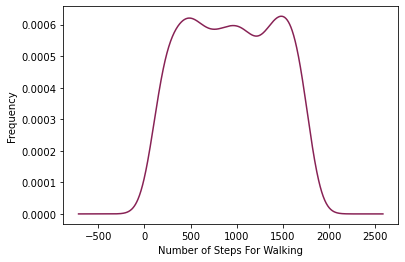

In [32]:
# plot number of leaningBack for walking
walking['Steps'].plot(kind='kde', color ='#882255')
plt.xlabel('Number of Steps For Walking')
plt.ylabel('Frequency')
plt.show()

(array([737671., 737672., 737673., 737674., 737675.]),
 <a list of 5 Text major ticklabel objects>)

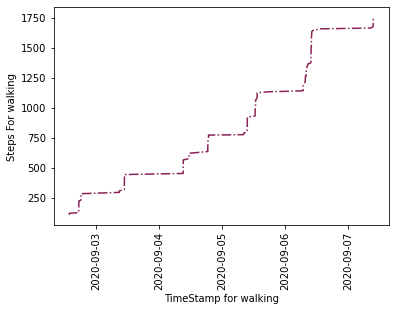

In [33]:
# plot number of steps and time stamp for walking
plt.plot(walking['TimeStamp'], walking['Steps'], linestyle='dashdot', color ='#882255')
plt.xlabel('TimeStamp for walking')
plt.ylabel('Steps For walking ')
plt.xticks(rotation='vertical')

In [34]:
#Filter Running from Posture
datasetVitals[datasetVitals['Posture'] == 'Running']

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI


In [35]:
#Filter Unknown from Posture
unknown = datasetVitals[datasetVitals['Posture'] == 'Unknown']
unknown

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI
2,2020-09-02 10:24:25.077,NaN,NaN,NaN,0.0,Unknown,NaN
5,2020-09-02 10:24:26.077,NaN,NaN,NaN,0.0,Unknown,NaN
6,2020-09-02 10:24:27.077,NaN,NaN,NaN,0.0,Unknown,NaN
9,2020-09-02 10:24:28.077,NaN,NaN,NaN,0.0,Unknown,NaN
11,2020-09-02 10:24:29.077,NaN,NaN,NaN,0.0,Unknown,NaN
...,...,...,...,...,...,...,...
9654,2020-09-02 11:23:16.077,NaN,NaN,NaN,101.0,Unknown,NaN
9657,2020-09-02 11:23:17.077,NaN,NaN,NaN,102.0,Unknown,NaN
9660,2020-09-02 11:23:18.077,NaN,NaN,NaN,104.0,Unknown,NaN
9663,2020-09-02 11:23:19.077,NaN,NaN,NaN,105.0,Unknown,NaN


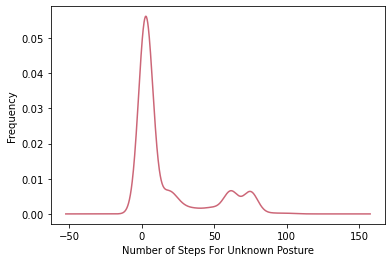

In [37]:
# plot number of leaningBack for Standing
unknown['Steps'].plot(kind='kde', color='#CC6677')
plt.xlabel('Number of Steps For Unknown Posture')
plt.ylabel('Frequency')
plt.show()

In [38]:
datasetVitals[datasetVitals['Posture'] == 'NaN']

,TimeStamp,HearthRate,Respiration Rate,Skin Temp,Steps,Posture,RRI


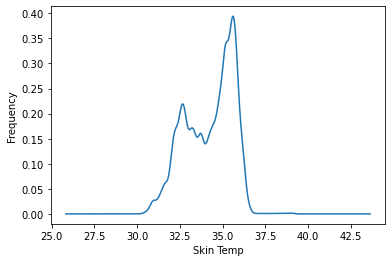

In [39]:
#Plot Skin Temp by hist or kde
datasetVitals['Skin Temp'].plot(kind='kde')
plt.xlabel('Skin Temp')
plt.ylabel('Frequency')
plt.show()

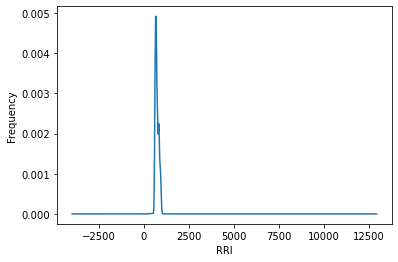

In [40]:
#Plot RRI by kde
datasetVitals['RRI'].plot(kind='kde')
plt.xlabel('RRI')
plt.ylabel('Frequency')
plt.show()

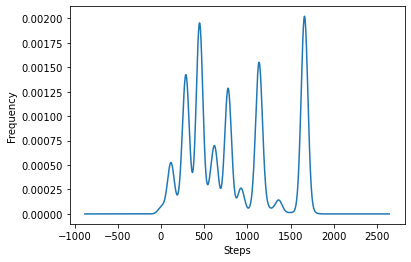

In [41]:
#Plot total Steps by kde
datasetVitals['Steps'].plot(kind='kde')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

(array([-5.0e+11,  0.0e+00,  5.0e+11,  1.0e+12,  1.5e+12,  2.0e+12,
         2.5e+12,  3.0e+12,  3.5e+12,  4.0e+12]),
 <a list of 10 Text major ticklabel objects>)

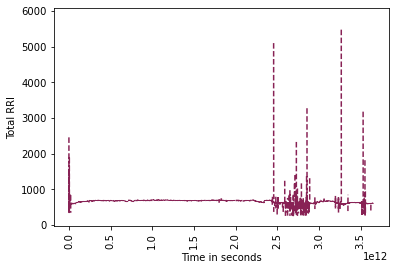

In [42]:
# plot time stamp and RRI
n1 = 0;
n2 = 10000;
X1 = datasetVitals['TimeStamp'].iloc[n1:n2]
X = X1-X1.iloc[0]
Y = datasetVitals['RRI'].iloc[n1:n2]
plt.plot(X, Y, color ='#882255',linestyle='dashed')
plt.xlabel('Time in seconds')
plt.ylabel('Total RRI')
plt.xticks(rotation='vertical')

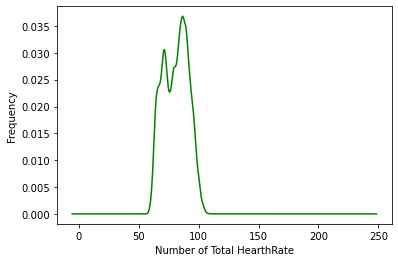

In [43]:
# plot HearthRate
datasetVitals['HearthRate'].plot(kind='kde', color='green')
plt.xlabel('Number of Total HearthRate')
plt.ylabel('Frequency')
plt.show()

# Conclusion